# 피마인디어 당뇨병
 1. 차원축소 - 시각화
 2. 차원축소 전후 분류 성능 

In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [82]:
diabetes_df = pd.read_csv('../00.data/diabetes.csv')
diabetes_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [83]:
diabetes_df.Outcome.value_counts()
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
zero_features = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 비율은 {zero_count/768:.4f}')

Pregnancies 0 건수는 111, 비율은 0.1445
Glucose 0 건수는 5, 비율은 0.0065
BloodPressure 0 건수는 35, 비율은 0.0456
SkinThickness 0 건수는 227, 비율은 0.2956
Insulin 0 건수는 374, 비율은 0.4870
BMI 0 건수는 11, 비율은 0.0143
DiabetesPedigreeFunction 0 건수는 0, 비율은 0.0000
Age 0 건수는 0, 비율은 0.0000


In [85]:
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0,diabetes_df[zero_features].mean())

In [86]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

In [87]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 차원 축소

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [89]:
diabetes_pca = pca.fit_transform(X_scaled)

In [90]:
diabetes_pca[:5, :]

array([[ 1.39627217, -0.61039515],
       [-1.60024481,  0.36414926],
       [ 0.1294467 , -0.91967118],
       [-2.04707845,  0.55096984],
       [ 1.36888729,  3.20004685]])

### 시각화 

In [91]:
diabetes_pca_df = pd.DataFrame(diabetes_pca, columns=['PC1','PC2'])
diabetes_pca_df['Outcome'] = y
diabetes_pca_df.head()

,PC1,PC2,Outcome
0,1.396272,-0.610395,1
1,-1.600245,0.364149,0
2,0.129447,-0.919671,1
3,-2.047078,0.550970,0
4,1.368887,3.200047,1


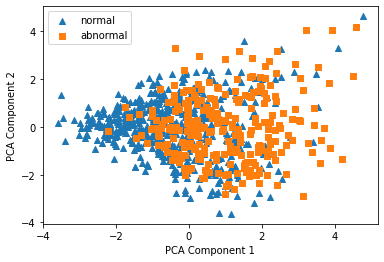

In [74]:
markers = ['^','s']
status = ['normal', 'abnormal']

for i, marker in enumerate(markers):
    x_data = diabetes_pca_df[diabetes_pca_df['Outcome']==i]['PC1']
    y_data = diabetes_pca_df[diabetes_pca_df['Outcome']==i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=status[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### 차원 축소 전후 성능 분류

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### PCA 전

In [93]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021
)

In [94]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.734375

### PCA 후

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_pca, y, stratify=y, random_state=2021
)

In [96]:
dtc2 = DecisionTreeClassifier(random_state=2021)
dtc2.fit(X_train, y_train)
pred = dtc2.predict(X_test)
accuracy_score(y_test, pred)

0.640625